In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [123]:
judo_olympics = pd.read_csv("./Judo.csv")

judo_olympics.head(3)


,date,stage_code,event_code,event_name,event_stage,stage,stage_status,gender,discipline_name,discipline_code,venue,participant_code,participant_name,participant_type,participant_country_code,participant_country,result,result_type,result_WLT,result_IRM
0,2024-08-02T10:50:18+02:00,JUDMO100KG------------R32-000400--,JUDMO100KG,Men +100 kg,Men +100 kg Elimination Round of 32,Elimination Round of 32,FINISHED,M,Judo,JUD,Champ-de-Mars Arena,1972368,KOKAURI Ushangi,Person,AZE,Azerbaijan,10,POINTS,W,NaN
1,2024-08-02T10:50:18+02:00,JUDMO100KG------------R32-000400--,JUDMO100KG,Men +100 kg,Men +100 kg Elimination Round of 32,Elimination Round of 32,FINISHED,M,Judo,JUD,Champ-de-Mars Arena,1953836,SILVA Rafael,Person,BRA,Brazil,0,POINTS,L,NaN
2,2024-08-02T10:50:18+02:00,JUDMO100KG------------R32-001200--,JUDMO100KG,Men +100 kg,Men +100 kg Elimination Round of 32,Elimination Round of 32,FINISHED,M,Judo,JUD,Champ-de-Mars Arena,1564559,TAKAYAWA Gerard,Person,FIJ,Fiji,0,POINTS,L,NaN


In [42]:
judo_olympics.shape

(884, 20)

In [44]:
judo_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      884 non-null    object
 1   stage_code                884 non-null    object
 2   event_code                884 non-null    object
 3   event_name                884 non-null    object
 4   event_stage               884 non-null    object
 5   stage                     884 non-null    object
 6   stage_status              884 non-null    object
 7   gender                    884 non-null    object
 8   discipline_name           884 non-null    object
 9   discipline_code           884 non-null    object
 10  venue                     884 non-null    object
 11  participant_code          884 non-null    object
 12  participant_name          884 non-null    object
 13  participant_type          884 non-null    object
 14  participant_country_code  

In [45]:
judo_olympics["participant_type"].unique()

array(['Person', 'Team'], dtype=object)

In [46]:
judo_olympics["result_type"].unique()

array(['POINTS', 'IRM_POINTS'], dtype=object)

In [47]:
judo_olympics["gender"].unique()

array(['M', 'X', 'W'], dtype=object)

In [124]:
to_drop = ["discipline_code","participant_country_code", "result_IRM"]


judo_olympics.drop(columns=to_drop, inplace=True)

In [53]:
judo_olympics.shape

(884, 17)

In [125]:
judo_olympics["date"] = pd.to_datetime(judo_olympics["date"])

In [58]:
judo_olympics["date"]

0     2024-08-02 10:50:18+02:00
1     2024-08-02 10:50:18+02:00
2     2024-08-02 10:50:18+02:00
3     2024-08-02 10:50:18+02:00
4     2024-08-02 10:50:18+02:00
                 ...           
879   2024-08-01 18:13:45+02:00
880   2024-08-01 18:21:21+02:00
881   2024-08-01 18:21:21+02:00
882   2024-08-01 18:34:44+02:00
883   2024-08-01 18:34:44+02:00
Name: date, Length: 884, dtype: datetime64[ns, UTC+02:00]

In [126]:
judo_olympics["result_WLT"].value_counts()

result_WLT
W    442
L    442
Name: count, dtype: int64

In [127]:
judo_olympics["result_WLT"] = judo_olympics["result_WLT"].apply(lambda x: 1 if x == "W" else 0)


In [63]:
judo_olympics["result"].describe()

count    884.000000
mean       3.651584
std        4.600050
min        0.000000
25%        0.000000
50%        1.000000
75%       10.000000
max       11.000000
Name: result, dtype: float64

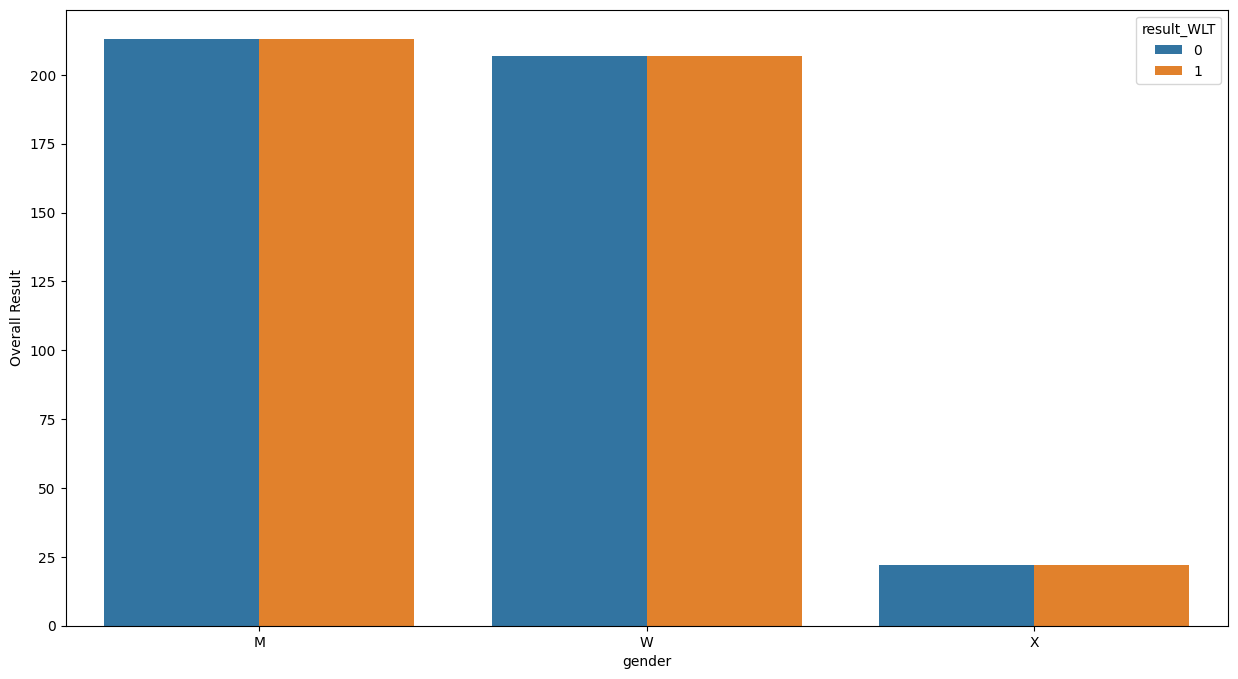

In [70]:
female_men_result = judo_olympics.groupby(judo_olympics["gender"])["result_WLT"].value_counts().reset_index(name="Overall Result")

plt.figure(figsize=(15, 8))
sns.barplot(x="gender", y="Overall Result", hue="result_WLT", data=female_men_result)
plt.show()

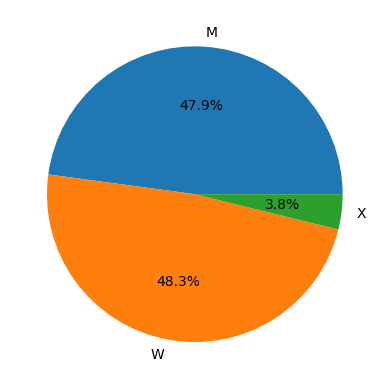

In [81]:
female_men_score = judo_olympics.groupby(judo_olympics["gender"])["result"].sum()

plt.pie(x=female_men_score, labels=female_men_score.index, autopct='%1.1f%%')
plt.show()


In [119]:
judo_olympics.head(3)

,date,stage_code,event_code,event_name,event_stage,stage,gender,discipline_name,venue,participant_code,participant_name,participant_type,participant_country,result,result_type,result_WLT
0,2024-08-02 10:50:18+02:00,JUDMO100KG------------R32-000400--,JUDMO100KG,Men +100 kg,Men +100 kg Elimination Round of 32,Elimination Round of 32,M,Judo,Champ-de-Mars Arena,1972368,KOKAURI Ushangi,Person,Azerbaijan,10,POINTS,0
1,2024-08-02 10:50:18+02:00,JUDMO100KG------------R32-000400--,JUDMO100KG,Men +100 kg,Men +100 kg Elimination Round of 32,Elimination Round of 32,M,Judo,Champ-de-Mars Arena,1953836,SILVA Rafael,Person,Brazil,0,POINTS,0
2,2024-08-02 10:50:18+02:00,JUDMO100KG------------R32-001200--,JUDMO100KG,Men +100 kg,Men +100 kg Elimination Round of 32,Elimination Round of 32,M,Judo,Champ-de-Mars Arena,1564559,TAKAYAWA Gerard,Person,Fiji,0,POINTS,0


C:\Users\baxti\AppData\Local\Temp\ipykernel_4504\2568151725.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y="participant_country", x="Total Result", palette="viridis")


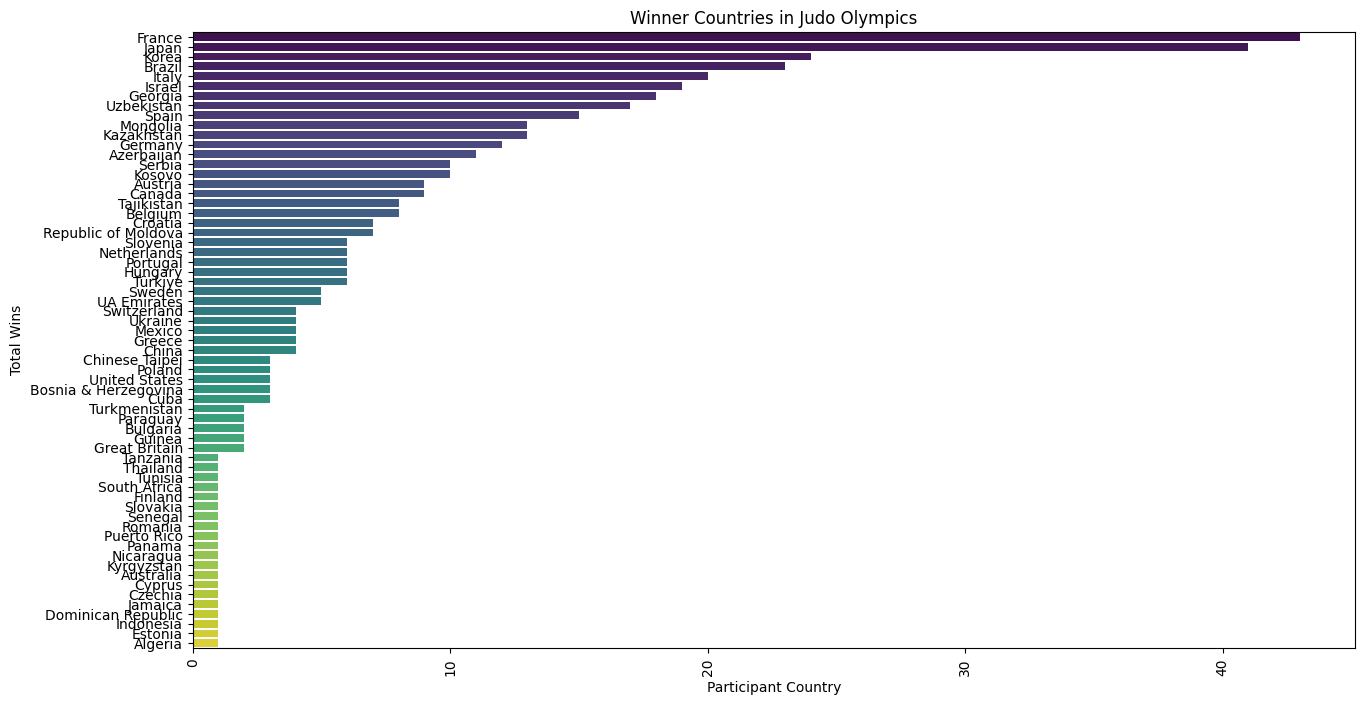

In [138]:
top_resulted_countries = judo_olympics.groupby(judo_olympics["participant_country"])["result_WLT"].value_counts().reset_index(name="Total Result")


winner_countries = top_resulted_countries[top_resulted_countries["result_WLT"] != 0]

top_countries = winner_countries.sort_values(by="Total Result", ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_countries, y="participant_country", x="Total Result", palette="viridis")
plt.title('Winner Countries in Judo Olympics')
plt.xlabel('Participant Country')
plt.ylabel('Total Wins')
plt.xticks(rotation=90)
plt.show()


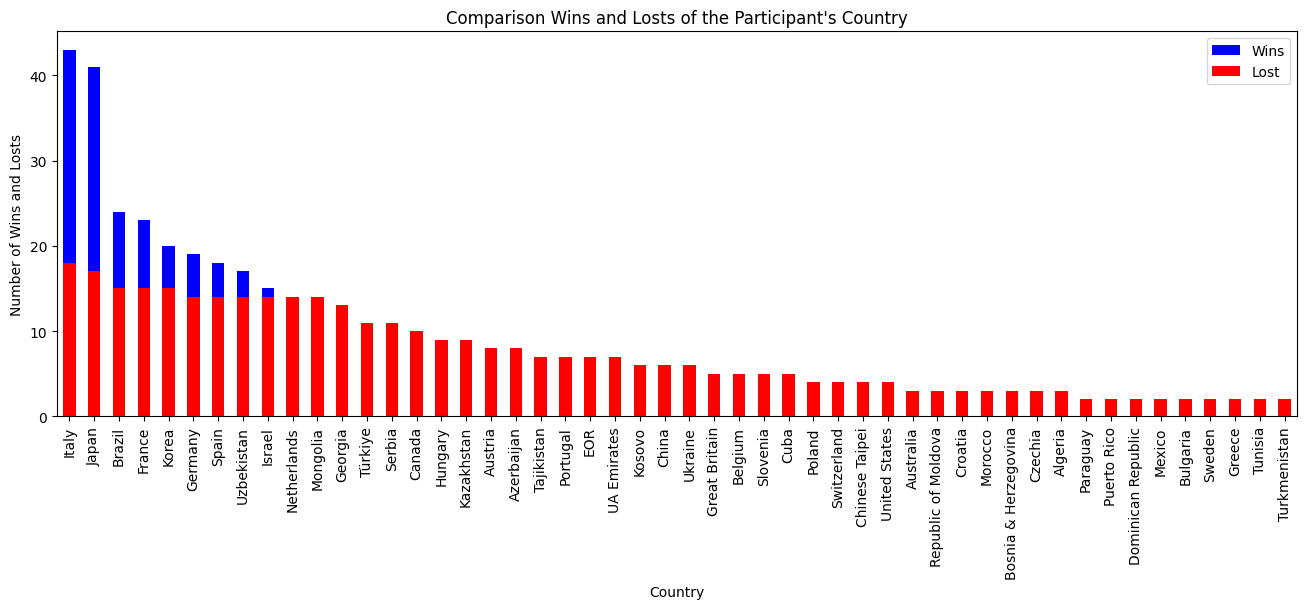

In [135]:
win = judo_olympics["result_WLT"] == 1
lost = judo_olympics["result_WLT"] == 0

plt.figure(figsize=[16,5])
judo_olympics.participant_country[win].value_counts().head(50).plot(kind="bar",color="blue",label="Wins")
judo_olympics.participant_country[lost].value_counts().head(50).plot(kind="bar",color="red",label="Lost")
plt.legend()
plt.title("Comparison Wins and Losts of the Participant's Country")
plt.xlabel("Country")
plt.ylabel("Number of Wins and Losts")
plt.show()

In [146]:
# No need to visialize since all the results are tied
highes_type = judo_olympics.groupby(judo_olympics["participant_type"])["result_WLT"].value_counts()

highes_type

participant_type  result_WLT
Person            0             420
                  1             420
Team              0              22
                  1              22
Name: count, dtype: int64

In [149]:
highes_type = judo_olympics.groupby(judo_olympics["participant_type"])["participant_country"].value_counts().reset_index(name="Total Count")

highes_type

,participant_type,participant_country,Total Count
0,Person,France,54
1,Person,Japan,54
2,Person,Korea,35
3,Person,Brazil,34
4,Person,Italy,33
...,...,...,...
136,Team,Hungary,1
137,Team,Kazakhstan,1
138,Team,Mongolia,1
139,Team,Netherlands,1


In [158]:
top = judo_olympics.groupby(['participant_code','participant_name','participant_type'])["participant_country"].count().reset_index(name="count")

top

,participant_code,participant_name,participant_type,count
0,1533112,McKENZIE Ashley,Person,2
1,1533245,SEHEN Sajjad,Person,1
2,1535373,GRIGORIAN Aram,Person,4
3,1535374,KOSTOEV Dzhafar,Person,2
4,1535375,MAGOMEDOMAROV Magomedomar,Person,2
...,...,...,...,...
392,JUDXTEAM6---MGL01,Mongolia,Team,1
393,JUDXTEAM6---NED01,Netherlands,Team,1
394,JUDXTEAM6---SRB01,Serbia,Team,3
395,JUDXTEAM6---TUR01,Türkiye,Team,1


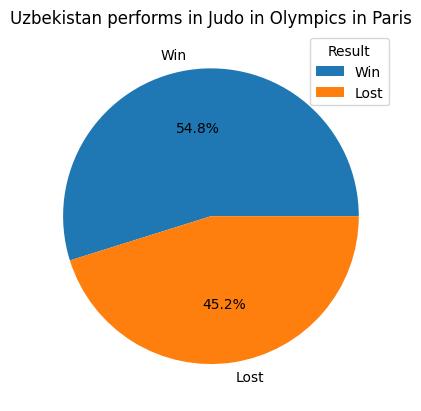

In [175]:
uzb_data = judo_olympics.loc[judo_olympics["participant_country"]=="Uzbekistan"]
uzb_result = uzb_data["result_WLT"].value_counts()

result_labels = {1: 'Win', 0: 'Lost'}

uzb_result.index = uzb_result.index.map(result_labels)

plt.pie(x=uzb_result, labels=uzb_result.index,autopct='%1.1f%%')
plt.title("Uzbekistan performs in Judo in Olympics in Paris")
plt.legend(
    labels=uzb_result.index,
    title="Result",
    loc="best"
)
plt.show()
